In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
data = pd.read_csv("Netflix_cleaned_1.csv")

<div class="alert alert-block alert-warning">

#1 (gopi)
* Question: trend of how long does netflix take to add on the show of past vs current
* Columns req: "difference", "type"
* Comments: We can include the type as well (like how lon TV shows take to be added to Netflix in comparison to Movies)
* Business perspective can be: If the time to be added to Netflix from the release date is lesser, it's a good point to attract the customers


In [2]:
data.head(2)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,20,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead
1,tv show,south africa,2021-09-24,9,24,2021,2021,tv-ma,NaN,2.0,8,africa,missing,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",s2,missing,"ama qamata, khosi ngema, gail mabalane, thaban...",blood & water


In [18]:
data.dtypes

type                object
country             object
date_added          object
month                int64
day                  int64
year                 int64
release_year         int64
rating              object
duration_min       float64
duration_season    float64
difference           int64
continent           object
country_cleaned     object
duration            object
listed_in           object
description         object
show_id             object
director            object
cast                object
title               object
dtype: object

In [22]:
# calculate the difference in months
# https://stackoverflow.com/questions/4039879/best-way-to-find-the-months-between-two-dates
data['date_added'] = pd.to_datetime(data['date_added'], format='%Y-%m-%d')

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

# create 'difference' in months
data['difference'] = data.apply(lambda row: diff_month(row['date_added'], datetime(row['release_year'], 1, 1)), axis=1)

In [23]:
movies = data[data['type']=='movie'].copy()
tvshows = data[data['type']=='tv show'].copy()

In [25]:
movies[movies['release_year']==2020].head(5)

,type,country,date_added,month,day,year,release_year,rating,duration_min,duration_season,difference,continent,country_cleaned,duration,listed_in,description,show_id,director,cast,title
0,movie,united states,2021-09-25,9,25,2021,2020,pg-13,90.0,NaN,20,north america,missing,90 min,documentaries,"as her father nears the end of his life, filmm...",s1,kirsten johnson,missing,dick johnson is dead
15,movie,missing,2021-09-22,9,22,2021,2020,tv-ma,67.0,NaN,20,missing,missing,67 min,"documentaries, international movies",declassified documents reveal the post-wwii li...,s17,"pedro de echave garcía, pablo azorín williams",missing,europe's most dangerous man: otto skorzeny in ...
58,movie,missing,2021-09-11,9,11,2021,2020,tv-14,145.0,NaN,20,missing,missing,145 min,"comedies, dramas, international movies",a budding politician has devious plans to rise...,s79,delhiprasad deenadayalan,"vijay sethupathi, parthiban, raashi khanna",tughlaq durbar
64,movie,nigeria,2021-09-10,9,10,2021,2020,tv-ma,147.0,NaN,20,africa,missing,147 min,"action & adventure, comedies, dramas",twins are reunited as a good-hearted female ga...,s85,"jjc skillz, funke akindele","funke akindele, ayo makun, chioma chukwuka akp...",omo ghetto: the saga
83,movie,missing,2021-09-06,9,6,2021,2020,tv-ma,117.0,NaN,20,missing,missing,117 min,"dramas, international movies, thrillers",a family faces destruction in a long-running c...,s104,yemi amodu,"jide kosoko, omotola jalade-ekeinde, yemi blaq...",shadow parties


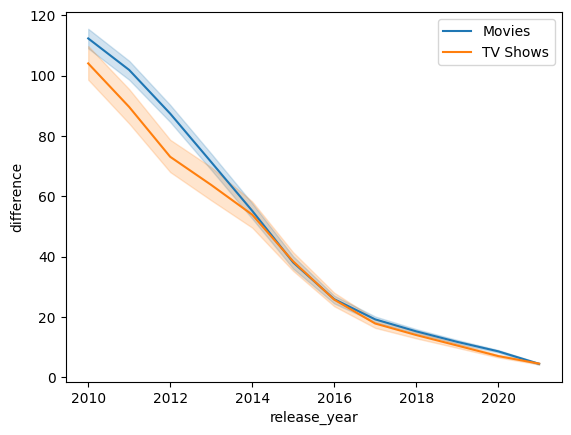

In [11]:
sns.lineplot(x=movies['release_year'], y=movies['difference'], label='Movies')
sns.lineplot(x=tvshows['release_year'], y=tvshows['difference'], label='TV Shows')
plt.legend()
plt.show()